<h1>Ch09. 텍스트를 위한 인공 신경망</h1>

<h2>09-1. 순차 데이터와 순환 신경망</h2>

keyword: `순차 데이터`, `순환 신경망`, `셀`, `은닉 상태`

<h3>순차 데이터</h3>

- **순차 데이터(sequential data)**는 텍스트나 **시계열 데이터(time series data)**와 같이 *순서에 의미가 있는 데이터*
    - 예: "I am a boy." (O) "boy am a I." (X)    
<br>

- 텍스트 데이터는 **단어의 순서**가 중요한 순차 데이터
    - 순서를 유지하며 신경망에 주입. 단어의 순서를 마구 섞어서 주입하면 안됨
- 따라서 순차 데이터를 다룰 때는 이전에 입력한 데이터를 기억하는 기능이 필요
    - 완전 연결 신경망이나 합성곱 신경망은 기억 장치가 없음
        - 하나의 샘플 (또는 하나의 배치)을 사용하여 정방향 계산을 수행하고 나면 그 샘플은 버려지고 다음 샘플을 처리할 때 재사용하지 않음
        - 이렇게 입력 데이터의 흐름이 앞으로만 전달되는 신경망을 **피드포워드 신경망(feedforward neural network, FFNN)**이라고 함
        - 완전 연결 신경망과 합성곱 신경망은 피드포워드 신경망에 속함
<br>

- 신경망이 이전에 처리했던 샘플을 다음 샘플을 처리하는데 재사용하기 위해 데이터 흐름이 앞으로만 전달되면 불가능함
- 다음 샘플을 위해 이전 데이터가 신경망 층에 순환되어야 함: **순환 신경망**

<h3>순환 신경망</h3>

- **순환 신경망(recurrent neural network, RNN)**은 일반적인 완전 연결 신경망과 비슷
- 완전 연결 신경망에 이전 데이터의 처리 결과가 순환되는 고리 하나만 추가하면 됨
    - 뉴런의 출력이 다시 자기 자신으로 전달됨
    - **타임스텝(timestep)** 샘플 처리 단계를 이용
        - 순환 신경망은 이전 타임 스텝의 샘플을 기억하지만 타임스텝이 오래될수록 순환되는 정보는 희미해짐
<br>

- 순환 신경망에서는 특별히 층을 **셀(cell)**이라고 칭함.
    - 한 셀에는 여러개의 뉴런이 있지만 완전 연결 신경망과 달리 뉴런을 모두 표시하지 않고 하나의 셀로 층을 표현
    - 셀의 출력을 **은닉 상태(hidden state)**라고 부름
<br>

- 입력에 가중치를 곱하고 활성화 함수를 통과시켜 다음 층으로 보냄.
    - 달라지는 것은 층의 출력(즉 은닉 상태)을 다음 타임 스텝에 재사용    
<br>

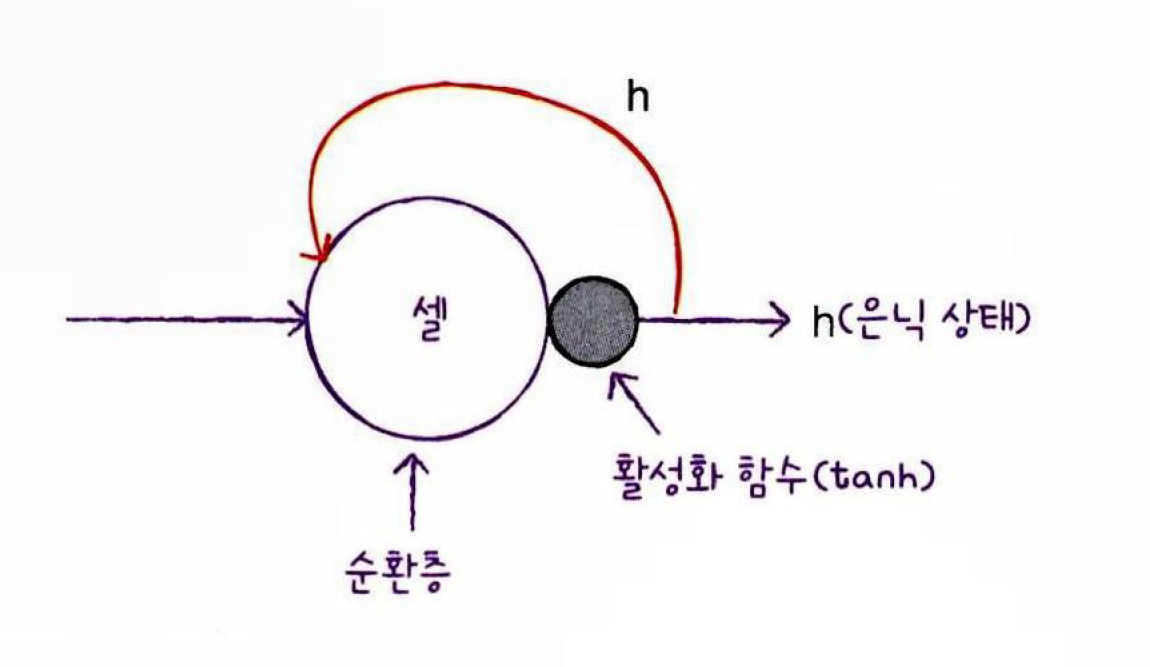

- 일반적으로 은닉층의 활성화 함수로는 **하이퍼볼릭 탄젠트(hyperbolic tangent)**함수인 *tanh*가 많이 사용됨
    - tanh 함수도 S자 모양을 띠기 때문에 종종 시그모이드 함수라고 불리기도 함
    - tanh 함수는 시그모이드 함수와는 달리 **-1 ~ 1** 사이의 범위를 가짐
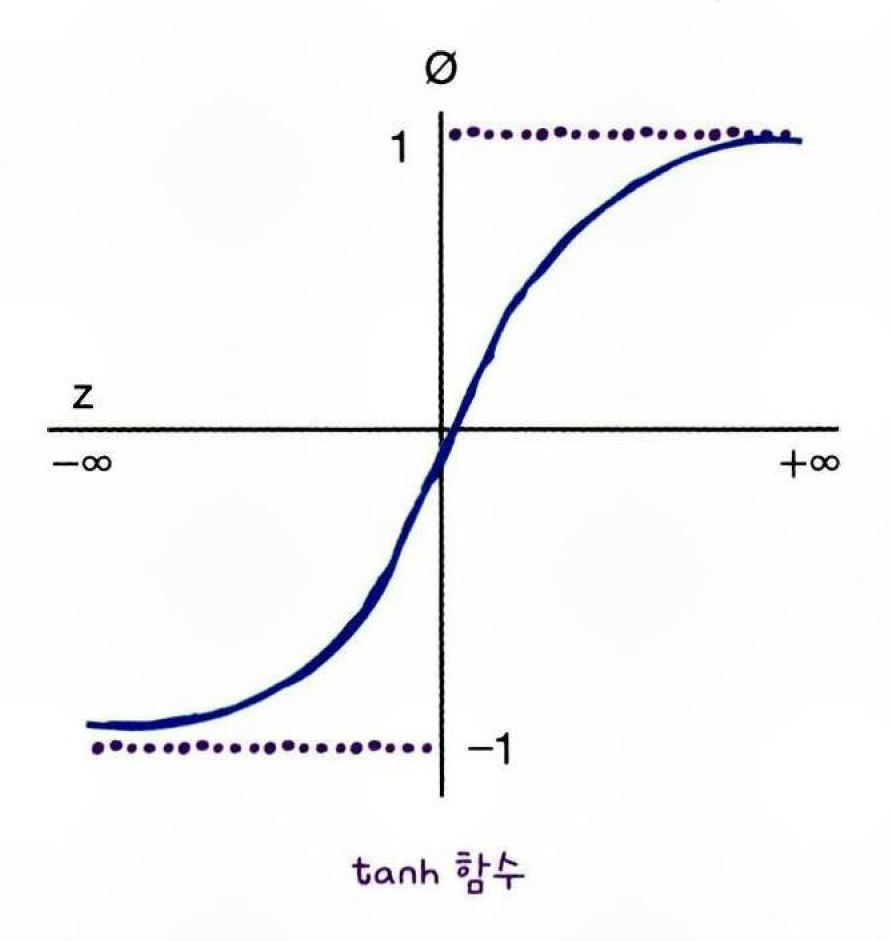

- 그림에는 활성화 함수를 표시하지 않는 경우가 많음
    - **순환 신경망에도 활성화 함수가 반드시 필요함**
<br>

- 피드포워드 신경망에서 뉴런은 **입력과 가중치를 곱함**
- 순환 신경망에서도 동일
    - 다만, 순환 신경망의 뉴런은 가중치가 하나 더 있음
    - 바로 이전 타임스텝의 은닉 상태에 곱해지는 가중치
    - 셀은 입력과 이전 타임스텝의 은닉 상태를 사용하여 현재 타임스텝의 은닉 상태를 만듦
<br>

- 아래의 그림에서 2개의 가중치를 셀 안에 구분하여 표시함
    - $W_x$는 입력에 곱해지는 가중치, $W_b$는 이전 타임스텝의 은닉 상태에서 곱해지는 가중치
    - 뉴런마타 하나의 절편이 포함 (따로 표시는 X)    

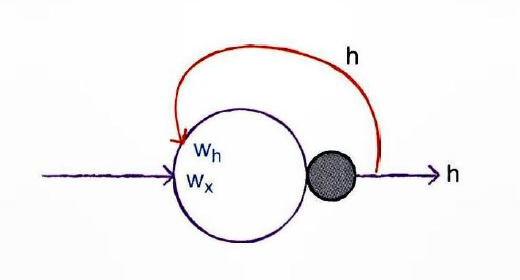

- 셀의 출력(은닉 상태)이 다음 타임스텝에 재사용되기 때문에 타임스텝으로 셀을 나누어 그릴 수 있음
    - 순환 신경망을 타입스텝마다 그릴 수 있음 = 셀을 타임스텝으로 펼침
<br>

- 타임스텝 1에서 셀의 출력 $h_1$이 타임스텝 2의 셀로 주입. 이때 $W_h$와 곱해짐
- 타임스텝 2에서 셀의 출력 $h_2$가 타임스텝 3의 셀로 주입. 이때 $W_h$와 곱해짐
- 모든 타임스텝에서 사용되는 **가중치 $W_h$는 하나**
- 가중치 $W_h$는 타임스텝에 따라 변화되는 뉴런의 출력을 학습
    - 이런 능력이 순차 데이터를 다루는 데 필요
<br>

- 맨 처음 타임스텝 1에서 사용되는 이전 은닉 상태 $h_0$은 어떻게 구함?
    - 맨 처음 샘플을 입력할 때는 이전 타임 스텝이 없음
    - 따라서 간단히 $h_0$은 모두 0으로 초기화
    

<h3>셀의 가중치와 입출력</h3>

- 복잡한 모델을 배울수록 가충지 개수를 계산해 보면 잘 이해하고 있는지 알 수 있음
- 예시
    - 순환층에 입력되는 특성의 개수가 4개이고 순환층의 뉴런이 3개라고 가정
    - 먼저 $W_x$의 크기
        - 입력층과 순환층의 뉴런이 모두 완전 연결되기 때문에 가중치 $W_x$의 크기는 4 x 3 = 12개가 됨
        - 완전 연결 신경망의 입력층과 은닉층의 연결과 같음
    - 순환층에서 다음 타임스텝에 재사용되는 은닉 상태를 위한 가중치 $W_h$의 크기
        - 순환층에 있는 첫 번째 뉴런(r_1)의 은닉 상태가 다음 타임스텝에 재사용될 때 첫 번째 뉴런과 두 번째 뉴런, 세 번째 뉴런에 모두 전달
        - 즉 이전 타임스텝의 은닉 상태는 다음 타임스텝의 뉴런에 완전히 연결
        - 두 번째 뉴런의 은닉 상태도 마찬가지로 첫 번재 뉴런과 두 번째 뉴런, 세 번째 뉴런에 모두 전달되고, 
        - 세 번째 뉴런의 은닉 상태도 동일
        - 따라서 이 순환층에서 은닉 상태를 위한 가중치 $W_h$는 3 x 3 = 9개
    - 모델 파라미터 개수 = 가중치 + 절편
        - 각 뉴런마낟 하나의 절편이 있음
        - 이 순환층은 모두 12 + 9 + 3 = 24개의 모델 파라미터를 갖고 있음
    - 순환층을 셀 하나로 표시하는 이유
        - 은닉 상태가 모든 뉴런에 순환되기 때문에 완전 연결 신경망처럼 그림으로 표현하기 어려움
        $$ 모델 파라미터 수 = W_x + W_b + 절편 = 12 + 9 + 3 = 24 $$
    - 순환층의 입력과 출력
        - **합성곱 층**의 입력은 전형적으로 하나의 샘플이 3개의 차원을 가짐
            - **너비, 높이, 채널**
            - 입력이 합성곱 층과 풀링 층을 통과하면 너비, 높이, 채널(혹은 깊이)의 크기가 달라지지만 차원의 개수는 그대로 유지
        - **순환층**은 일반적으로 샘플마다 2개의 차원을 가짐
            - 보통 하나의 샘플을 하나의 시퀀스라고 말함
            - 시퀀스 안에는 여러개의 아이템이 들어 있음
            - 시퀀스의 길이 = 타임스텝 길이
            - 예시
                - 어떤 샘플에 "I am a boy"란 문장이 있음
                - 이 샘플은 4개의 단어로 이루어져 있음
                - 각 단어를 3개의 어떤 숫자(1, 4, 3)로 표현한다고 가정
                - 이런 입력이 순환층을 통과하면 두 번째, 세 번째 차원이 사라지고 순환층의 뉴런 개수만큼 출력
                - 하나의 샘플은 시퀀스 길이(단어 개수)와 단어 표현의 2차원 배열
                - 순환층을 통과하면 1차원 배열로 바뀜
                - 이 1차원 배열의 크기는 순환층의 뉴런 개수에 의해 결정
            - 케라스의 순환층은 기본적으로 마지막 타임스텝의 은닉 상태만 출력으로 내보냄
                - 이는 마치 입력된 시퀀스에서 읽은 모든 정보를 마지막 은닉 상태에 압축하여 전달하는 것처럼 볼 수 있음
                - 그래서 순환 신경망이 정보를 기억하는 메모리를 가진다고 표현하기도 함
            - 순환 신경망도 완전 연결 신경망이나 합성곱 신경망처럼 여러 개의 층을 쌓을 수 있음
                - 셀의 입력은 샘플마다 타임스텝과 단어 표현으로 이루어진 2차원 배열이어야 함
                - 따라서 첫 번째 셀이 마지막 타임스텝의 은닉 상태만 출력해서는 안됨
                - 이런 경우에는 마지막 셀을 제외한 다른 모든 셀은 모든 타임스텝의 은닉 상태를 출력함
                - 첫 번째 셀은 모든 타임스텝의 은닉 상태를 출력하고, 두 번째 셀은 마지막 타임스텝의 은닉 상태만 출력
        - 출력층의 구성
            - 마지막에는 밀집층을 두어 클래스를 분류
                - 다중 분류일 경우에는 출력층에 클래스 개수만큼 뉴런을 두고 소프트맥스 활성화 함수를 사용
                - 이진 분류일 경우에는 하나의 뉴런을 두고 시그모이드 활성화 함수를 사용
            - 합성곱 신경망과 다른 점은 마지막 셀의 출력이 1차원이기 때문에 `Flatten`클래스로 펼칠 필요가 없음
                - 셀의 출력을 그대로 밀집층에 사용


<h2>순환 신경망으로 IMDB 리뷰 분류하기</h2>

Keyword: `말뭉치`, `토큰`, `원-핫 인코딩`, `단어 임베딩`

- 대표적인 순환 신경망 문제인 IMDB 리뷰 데이터셋을 사용해 가장 간단한 순환 신경망 모델을 훈련
- 이 데이터셋을 두 가지 방법으로 변형하여 순환 신경망에 주입
    - 원-핫 인코딩
    - 단어 임베딩
<br>

<h3>IMBD 리뷰 데이터셋</h3>

- **IMDB 리뷰 데이터셋**은 유명한 인터넷 영화 데이터베이스인 imdb.com에서 수집한 리뷰를 감상평에 따라 긍정과 부정으로 분류해 놓은 데이터셋
- 총 50,000개의 샘플로 이루어져 있고 훈련 데이터와 테스트 데이터에 각각 25,000개씩 나누어져 있음

---
> `자연어 처리와 말뭉치는 무엇인가요?`   
> `자연어처리(Natural language processing, NLP)`는 컴퓨터를 사용해 인간의 언어를 처리하는 분야   
> 대표적인 세부 분야로는 음성 인식, 기계 번역, 감성 분석 등   
> IMDB 리뷰를 감상평에 따라 분류하느 작업은 감성 분석에 해당   
> 자연어 처리 분야에서는 훈련 데이터를 종종 `말뭉치(corpus)`라고 부름   
> 예를 들어 IMDB 리뷰 데이터셋이 하나의 말뭉치

- 텍스트 자체를 신경망에 전달하지는 않음
- 컴퓨터에서 처리하는 모든 것은 어떤 숫자 데이터
- 이미지는 정수 픽셀값으로 이루어져 있어 따로 변환하지 않음
- 텍스트 데이터의 경우, 단어를 숫자 데이터로 바꾸는 일반적인 방법은 데이터에 등장하는 **단어마다 고유한 정수를 부여**
    - 각 단어를 하나의 정수에 매핑, 동일한 단어는 동일한 정수에 매핑
    - 단어에 매핑되는 정수는 단어의 의미나 크기와 관련이 없음
    - 일반적으로 영어 문장은 모두 소문자로 바꾸고 구둣점을 삭제한 다음 공백을 기준으로 분리
    - 이렇게 분리된 단어를 **토큰(token)**이라고 부름
    - 하나의 샘플은 여러 개의 토큰으로 이루어져 있고 1개의 토큰이 하나의 타임스텝에 해당
- 토큰에 할당하는 정수 중에 몇 개는 특정한 용도로 예약되어 있는 경우가 많음
    - 예: 0 = 패딩, 1 = 문장의 시작, 2 = 어휘 사전에 없는 토큰
<br>

---
> `어휘사전`   
> 훈련 세트에서 고유한 단어를 뽑아 만든 목록
> 테스트 세트 안에 어휘 사전에 없는 단어가 있다면 2로 변환하여 신경망 모델에 주입
---
<br>

- 실제 IMDB 리뷰 데이터셋은 영어로 된 문장이지만 편리하게도 케라스에는 이미 정수로 바꾼 데이터가 포함되어 있음
- `keras.datasets`패키지 아래 `imdb`모듈을 임포트하여 이 데이터를 적재
- 여기에서는 전체 데이터셋에서 가장 자주 등장하는 단어 200개만 사용
- 이렇게 하기 위해 `load_data()`함수의 `num_words`매개변수를 200으로 지정

In [78]:
from keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words = 200
)

In [79]:
#훈련 세트와 테스트 세트의 크기 확인
print(train_input.shape, test_input.shape)

(25000,) (25000,)


- 데이터셋은 훈련 세트와 테스트 세트가 각각 25,000개의 샘플로 이루어져 있음
- 현재 shape로 크기를 확인했을 때 1차원 배열임
- IMDB 리뷰 텍스트는 길이가 제각각
    - 따라서 고정 크기의 2차원 배열에 담기 보다는 리뷰마다 별도의 파이썬 리스트로 담아야 메모리를 효율적으로 사용    
    $$ train_input: [리뷰1(파이썬 리스트), 리뷰2, 리뷰3, ...] = 넘파이 배열 $$
<br>

- 이 데이터는 개별 리뷰를 담은 파이썬 리스트 객체로 이루어진 넘파이 배열
- 넘파이 배열은 정수나 실수가 아닌 다른 파이썬 객체를 담을 수 있음

In [80]:
#첫 번째 리뷰의 길이 출력
#218개의 토큰으로 이루어져 있음
print(len(train_input[0]))

218


In [81]:
#두 번째 리뷰의 길이 출력
print(len(train_input[1]))

189


In [82]:
#첫 번재 리뷰에 담긴 내용을 출력
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 2, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 2, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 2, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 2, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 2, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 2, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 2, 92, 25, 104, 4, 2, 65, 16, 38, 2, 88, 12, 16, 2, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


- 케라스에 있는 IMDB 리뷰 데이터는 이미 정수로 변환되어 있음
- `num_words = 200`으로 지정했기 때문에 어휘 사전에는 200개의 단어만 들어가 있음
- 어휘 사전에 없는 단어는 모두 2로 표시되어 나타남   
<br>

---
> `200개의 단어를 고른 기준`   
> `imdb.load_data()`함수는 전체 어휘 사전에 있는 단어를 `등장 횟수 순서`대로 나열한 다음   
> `가장 많이 등장한 200개의 단어`를 선택   

In [83]:
#타깃 데이터 출력
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


- 해결할 문제는 리뷰가 긍정인지 부정인지를 판단
- 따라서 이진 분류 문제로 볼 수 있고 타깃값은 0(부정)과 1(긍정)으로 나누어짐

In [84]:
#훈련세트에서 검증세트 분리
#원래 훈련 세트의 크기는 25,000개였으므로 20%를 검증세트로 분리하면 훈련세트의 크기는 20,000개로 줄어듦
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size = 0.2, random_state= 42)

In [85]:
#각 리뷰의 길이를 계산해 넘파이 배열에 담음
#평균적인 리뷰의 길이와 가장 짧은 리뷰의 길이 그리고 가장 긴 리뷰의 길이를 확인하기 위함
#넘파이 리스트 내포를 사용해 train_input의 원소를 순회하면서 길이를 측정
import numpy as np

lengths = np.array([len(x) for x in train_input])

In [86]:
#lengths 배열이 준비되었으므로
#넘파이 mean()함수와 median()함수를 사용해 리뷰 길이의 평균과 중간값을 구함
print(np.mean(lengths), np.median(lengths))

#평균 단어 개수는 239개, 중간값이 178
#리뷰 길이 데이터는 한쪽으로 치우친 분포

239.00925 178.0


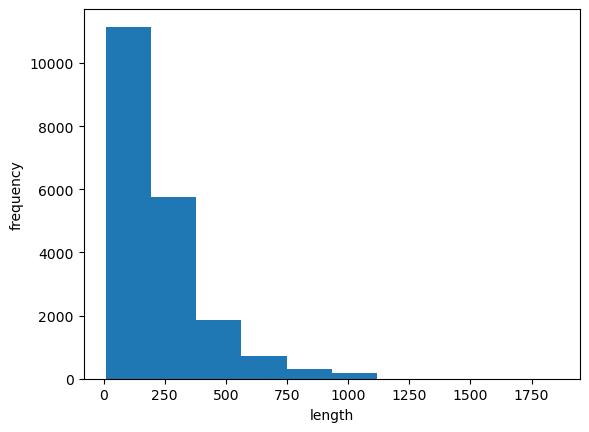

In [87]:
#lengths 배열을 히스토그램으로 표현
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

- 대부분의 리뷰 길이는 300 미만
- 평균이 중간값보다 높은 이유는 오른쪽 끝에 아주 큰 데이터가 있기 때문
<br>

- 리뷰는 대부분 짧아서 이 예제에서는 중간값보다 훨씬 짧은 100개의 단어만 사용
- 하지만 여전히 100개의 단어보다 작은 리뷰가 있음
- 이런 리뷰들의 길이를 100에 맞추기 위해 **패딩**이 필요함
    - 보통 패딩을 나타내는 토큰으로는 0을 사용
<br>

- 수동으로 리뷰를 순회하며 길이 100이 되도록 잘라내거나 0으로 패딩할 수는 있음
- 케라스는 시퀀스 데이터의 길이를 맞추는 `pad_sequences()`함수를 제공
- 이 함수를 사용하여 train_input의 길이를 100으로 맞춤

In [88]:
#케라스의 pad_sequences() 함수를 사용하여 train_input의 길이를 100으로 통일
from keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)

#-------------------------------------------------------------------
#maxlen에 원하는 길이를 지정하면 긴 경우는 잘라내고, 짧은 경우는 0으로 패딩

In [89]:
#패딩된 결과 확인
#train_seq의 크기 확인
print(train_seq.shape)

#-------------------------------------------------------------------
#train_input은 파이썬 리스트의 배열이었지만 길이를 100으로 맞춘 train_seq는 (2000, 100) 크기의 2차원 배열이 됨

(20000, 100)


In [90]:
#train_seq에 있는 첫 번째 샘플 출력
print(train_seq[0])

#-----------------------------------------------------------------
#샘플 앞뒤에 0이 없는 것으로 보아 100보다는 길이가 길었을 것

[ 10   4  20   9   2   2   2   5  45   6   2   2  33   2   8   2 142   2
   5   2  17  73  17   2   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12   2  69   2 142  73   2   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]


In [91]:
#샘플의 앞과 뒤 중에서 잘린 부분을 알아보기 위해 
#train_input에 있는 원본 샘플의 끝에서 10개의 토큰 확인
print(train_input[0][-10:])

#------------------------------------------------------------------
#출력한 10개의 토큰을 비교했을 때 train_seq[0]의 출력값과 일치
#샘플의 앞부분이 잘렸다는 것을 알 수 있음

[6, 2, 46, 7, 14, 20, 10, 10, 2, 158]


- `pad_sequences()`함수는 기본으로 `maxlen`보다 긴 시퀀스의 **앞부분**을 자름
    - 이렇게 하는 이유는 시퀀스의 뒷부분의 정보가 더 유용하리라 기대하기 때문
    - 영화 리뷰 데이터의 경우 리뷰 끝에 결정적인 소감을 말할 가능성이 높음
- 시퀀스의 뒷부분을 잘라내고 싶다면 `pad_sequences()`함수의 `truncating` 매개변수 값을 기본값인 `pre`가 아닌 `post`로 바꾸면 됨

In [92]:
#train_seq에 있는 여섯 번째 샘플을 출력
print(train_seq[5])

#-------------------------------------------------------------------
#앞부분에 0이 있는 것으로 보아 이 샘플의 길이는 100이 안됨
#역시 같은 이유로 패딩 토큰은 시퀀스의 뒷부분이 아니라 앞부분에 추가

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2   2   2 183  10
  10  13  82  79   4   2  36  71   2   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14   2  56 129   2  10  10  21   2  94   2   2   2   2  11 190
  24   2   2   7  94   2   2  10  10  87   2  34  49   2   7   2   2   2
   2   2   2   2  46  48  64  18   4   2]


- 시퀀스의 마지막에 있는 단어가 셀의 은닉 상태에 가장 큰 영향을 미치게 되므로
- 마지막에 패딩을 추가하는 것은 일반적으로 선호하지 않음
- 하지만 원한다면 `pad_sequences()`함수의 `padding`매개변수의 기본값인 `pre`를 `post`로 바꾸면 샘플의 뒷부분에 패딩 추가 가능

In [93]:
#검증 세트의 길이 100으로 통일
val_seq = pad_sequences(val_input, maxlen=100)

<h3>순환 신경망 만들기</h3>

- 케라스는 여러 종류의 순환층 클래스를 제공
- 가장 간단한 것은 `SimpleRNN`클래스
- IMDB 리뷰 분류 문제는 이진 분류이므로 마지막 출력층은 1개의 뉴런을 가지고 시그모이드 활성화 함수를 사용

In [94]:
#케라스의 Sequential 클래스로 만든 신경망 코드를 살펴보기
import keras

model = keras.Sequential()
model.add(keras.layers.Input(shape=(100, 200)))
model.add(keras.layers.SimpleRNN(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

#--------------------------------------------------------------
#SimpleRNN 클래스 사용
#Input 함수의 입력 차원을 (100, 200)으로 지정
#첫 번째 차원이 100인 것은 앞에서 샘플의 길이를 100으로 지정했기 때문

- `SimpleRNN`클래스에 사용할 뉴런의 개수를 지정
- 순환층도 당연히 활성화 함수를 사용
- `SimpleRNN`클래스의 `activation`매개변수의 기본값은 `'tanh'`로 하이퍼볼릭 탄젠트 함수 사용
    - 기본값 그대로 사용
<br>

- `Input`함수에서 `shape`매개변수의 두 번째 차원인 200은 어디서 온 숫자?
    - 이전 섹션에서 만든 train_seq와 val_seq에는 한 가지 큰 문제가 있음
    - 토큰을 정수로 변환한 이 데이터를 신경망에 주입하면 큰 정수가 큰 활성화 출력을 만들기 때문
<br>

- 이 정수들 사이에는 관련이 없음
    - 20번 토큰을 10번 토큰보다 중요시해야할 이슈가 없음
    - 따라서 단순한 정숫값을 신경망에 입력하기 위해서는 다른 방식을 찾아야 함
<br>

- 정숫값에 있는 크기 속성을 없애고 각 정수를 고유하게 표현하는 방법은 `원-핫 인코딩`
    - 예시
        - `train_seq[0]`의 첫 번째 토큰인 10을 원-핫 인코딩으로 바꾸면
        - 열한 번째 원소만 1이소 나머지는 모두 0인 배열
    - 예시 배열의 길이는
        - `imdb.load_data()`함수에서 200개의 단어만 사용하도록 지정했기 때문에 고유한 단어는 모두 200개
        - 즉 훈련 데이터에 포함될 수 있는 정숫값의 범위는 0(패딩 토큰)에서 199까지
        - 따라서 이 범위를 원-핫 인코딩으로 표현하려면 배열의 길이가 200이어야 함
    - 토큰마다 200개의 숫자를 사용해 표현
        - 다만 200개 중에 하나만 1이고 나머지는 모두 0으로 만들어 정수 사이에 있던 크기 속성을 없애는 원-핫 인코딩을 사용


In [95]:
#keras.utils 패키지 아래에 있는 to_categorical() 함수를 사용
#정수 배열을 입력하면 자동으로 원-핫 인코딩된 배열을 반환
train_oh = keras.utils.to_categorical(train_seq)

#------------------------------------------------------
#train_seq를 원-핫 인코딩으로 변환하여 train_oh 배열을 만듦

In [96]:
#배열의 크기를 출력
print(train_oh.shape)

#--------------------------------------------------------
#정수 하나마다 모두 200차원의 배열로 변경되었기 때문에
#(20000, 100)크기의 train_seq가 (20000, 100, 200)크기의 train_oh로 바뀜
#샘플 데이터의 크기가 1차원 정수 배열 (100, )에서 2차원 배열 (100, 200)로 바꾸었으므로
#Input 함수의 shape 매개변수의 값을 (100, 200)으로 지정

(20000, 100, 200)


In [97]:
#train_oh의 첫 번째 샘플의 첫 번째 토큰이 10이 잘 인코딩되었는지 출력
print(train_oh[0][0][:12])

#-------------------------------------------------------------
#처음 12개의 원소를 출력해 보면 열한 번째 원소가 1인 것을 확인
#나머지 원소는 모두 0?

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [98]:
#넘파이 sum()함수로 모든 원소의 값을 더해서 1이 되는지 확인
print(np.sum(train_oh[0][0]))

#-------------------------------------------------------------
#토큰 10이 잘 인코딩된 것 같음
#열한 번째 원소만 1이고 나머지는 모두 0이어서 원-핫 인코딩된 배열의 값을 모두 더한 결과가 1

1.0


In [99]:
#같은 방식으로 val_seq도 원-핫 인코딩으로 변환
val_oh = keras.utils.to_categorical(val_seq)

In [100]:
#훈련에 사용할 훈련세트와 검증세트 준비 완료
#모델의 구조 출력
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)        │ (None, 8)              │         1,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,681 (6.57 KB)

 Trainable params: 1,681 (6.57 KB)

 Non-trainable params: 0 (0.00 B)

- `SimpleRNN`에 전달할 샘플의 크기는 (100, 200)이지만 이 순환층은 마지막 타임스텝의 은닉 상태만 출력
- 이 때문에 출력 크기가 순환층의 뉴런 개수와 동일한 8임을 확인
<br>

- 순환층에 사용된 모델 파라미터의 개수를 계산
    - 입력 토큰은 200차원의 원-핫 인코딩 배열
    - 이 배열이 순환층의 뉴런 8개와 완전히 연결되기 때문에 총 200 x 8 = 1,600개의 가중치가 있음
    - 순환층의 은닉 상태는 다시 다음 타임스텝에 사용되기 위해 또 다른 가중치와 곱해짐
    - 이 은닉 상태도 순환층의 뉴런과 완전히 연결되기 때문에 8(은닉 상태 크기) x 8(뉴런개수) = 64개의 가중치가 필요
    - 마지막으로 뉴런마다 하나의 절편이 있음
    - 따라서 모두 1,600 + 64 + 8 = 1,672개의 모델 파라미터가 필요

<h3>순환 신경망 훈련하기</h3>

- 모델을 만드는 것은 달라도 훈련하는 방법은 모두 같음
    - 케라스 API를 사용하는 장점


In [101]:
#Adam 옵티마이저르 사용하고 이진 분류 문제이므로 손실 함수로 'binary_crossentropy'를 사용
#그다음 에포크 횟수를 100으로 늘리고 배치 크기는 64개로 설정
#그 밖에 체크포인트와 조기 종료를 구성하는 코드는 거의 동일
#GPU 메모리 터져서 스킵

<h3>단어 임베딩을 사용하기</h3>

- 순환 신경망에서 텍스트를 처리할 때 즐겨 사용하는 방법 = **단어 임베딩(word embedding)**
- 단어 임베딩은 각 단어를 고정된 크기의 실수 벡터로 바꿈
- 단어 임베딩으로 만들어진 벡터는 원-핫 인코딩된 벡터보다 훨씬 의미 있는 값으로 채워져 있기 때문에 자연어 처리에서 더 좋은 성능을 내는 경우가 많음
- 케라스에서는 `keras.layers`패키지 아래 `Embedding`클래스로 임베딩 기능 제공
    - 이 클래스를 모델에 추가하면 처음에는 다른 층처럼 모든 벡터가 랜덤하게 초기화되지만 훈련을 통해 데이터에서 좋은 단어 임베딩을 학습
<br>

- 단어 임베딩의 장점:
    - 입력으로 정수 데이터를 받음
    - 원-핫 인코딩으로 변경된 train_oh 배열이 아니라 train_seq를 사용할 수 있음
    - 이 때문에 메모리를 훨씬 효율적으로 사용할 수 있음
<br>

- 앞서 원-핫 인코딩은 샘플의 크기를 200차원으로 늘림
- 임베딩 층도 각각의 샘플을 고정된 크기의 벡터로 표현
- 하지만 원-핫 인코딩과는 달리 훨씬 작은 크기로도 단어를 잘 표현 가능
    - 메모리를 절약하고 더 많은 단어 사용가능

In [102]:
#많이 등장하는 500개의 단어까지 선택해서 IMDB 데이터셋 다시 준비
(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500
)
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [103]:
#Embedding 클래스를 SimpleRNN 층 앞에 추가한 두 번째 순환 신경망 생성
model_emb = keras.Sequential()
model_emb.add(keras.layers.Input(shape=(100,)))
model_emb.add(keras.layers.Embedding(500, 16))
model_emb.add(keras.layers.SimpleRNN(8))
model_emb.add(keras.layers.Dense(1, activation='sigmoid'))

#----------------------------------------------------------------
#train_seq를 그대로 사용하므로 Input함수에 지정할 입력의 크기는 (100,)
#Embedding 클래스의 첫 번째 매개변수(500)는 어휘 사전의 크기
#imdb.load_data(num_words=500)으로 데이터를 준비했기 때문에 고유한 토큰의 개수는 총 500개
#이 값이 임베딩 층의 첫 번째 매개변수
#두 번째 매개변수(16)는 임베딩 벡터의 크기


In [104]:
#모델 구조 출력
model_emb.summary()

#------------------------------------------------------------------
#임베딩 층은 (100,) 크기의 입력을 받아 (100, 16) 크기의 출력 생성
#모델 파라미터 개수 계산
##Embedding 클래스는 200개의 각 토큰을 크기가 16인 벡터로 변경
##총 200 x 16 = 3,200개의 모델 파라미터를 가짐
##SimpleRNN 층은 임베딩 벡터의 크기가 16이므로 8개의 뉴런과 곱하기 위해 필요한 가중치 16 x 8 = 128개를 가짐
##은닉 상태에 곱해지는 가중치 8 x 8 = 64ro
##8개의 절편이 있으므로 이 순환층에 있는 전체 모델 파라미터 개수는 128 + 64 + 8 =  200개
##마지막 Dense층의 가중치 개수는 이전과 동일하게 9개

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 8)              │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,209 (32.07 KB)

 Trainable params: 8,209 (32.07 KB)

 Non-trainable params: 0 (0.00 B)

In [105]:
#모델 훈련
model_emb.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model_emb.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

#---------------------------------------------------
#출력 결과를 통해 원-핫 인코딩을 사용한 모델보다 조금 더 나은 성능
#순환층의 가중치 개수는 훨씬 작고 훈련 세트 크기도 훨씬 줄어듦

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.5385 - loss: 0.6888 - val_accuracy: 0.7096 - val_loss: 0.5821
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.6554 - loss: 0.6331 - val_accuracy: 0.7192 - val_loss: 0.5775
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.7360 - loss: 0.5502 - val_accuracy: 0.6346 - val_loss: 0.6377
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.6809 - loss: 0.6012 - val_accuracy: 0.7200 - val_loss: 0.5675
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.7527 - loss: 0.5181 - val_accuracy: 0.7514 - val_loss: 0.5290
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.7663 - loss: 0.5005 - val_accuracy: 0.7210 - val_loss: 0.5683
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7783 - loss: 0.4905 - val_accuracy: 0.7480 - val_loss: 0.5404
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.7953 - loss: 0.4598 

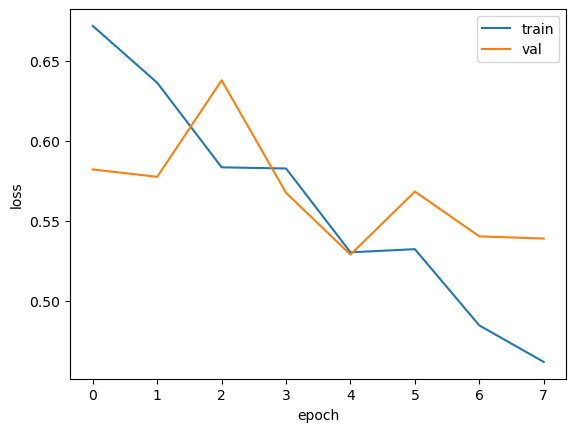

In [106]:
#훈련 손실과 검증 손실을 그래프로 출력
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

#-------------------------------------------------------
#검증 손실이 더 감소하지 되지 않아 훈련이 적절히 조기 종료
#이에 비해 훈련 손실은 계속 감소
##첫 실행에서 그래프가 교재랑 다르길래 Run All을 한 번 더 돌렸더니 그래프가 또 달라졌다.....

<h2>LSTM과 GRU 셀</h2>

Keyword: `LSTM`, `셀 상태`, `GRU`
<br>

- 일반적으로 기본 순환층은 긴 시퀀스를 학습하기 어려움
- 시퀀스가 길수록 순환되는 은닉 상태에 담긴 정보가 점차 희석
- 따라서 멀리 떨어져 있는 단어 정보를 인식하는 데 어려움이 있음
- 이를 위해 LSTM과 GRU 셀이 발명

<h3>LSTM 구조</h3>

- **LSTM(Long Short-Term Memory)**
    - 단기 기억을 오래 기억하기 위해 고안
<br>

- LSTM의 구조
    - 입력과 가중치를 곱하고 절편을 더해 활성화 함수를 통과시키는 구조를 여러 개 가지고 있음
    - 이런 계산 결과는 다음 타임스텝에 재사용
    - 은닉 상태를 만드는 방법
        - 은닉 상태: 입력과 이전 타임스텝의 은닉 상태를 가중치에 곱한 후 활성화 함수를 통과시켜 다음 은닉 상태를 만듦
        - 이때 기본 순화능과는 달리 **시그모이드 활성화 함수**를 사용
        - 또 tanh 활성화 함수를 통과한 어떤 값과 곱해져서 은닉 상태를 만듦
        - LSTM에는 순환되는 상태가 2개
        - 은닉상태 말고 **셀 상태(cell state)**라고 부르는 값이 있음
            - 은닉 상태와 달리 셀 상태는 다음 층으로 전달되지 않고 현재 셀 안에서만 순환되는 값
            - 셀 상태를 계산하는 방법: 입력과 은닉 상태를 또 다른 가중치 $W_f$에 곱한 다음 시그모이드 함수를 통과   
                그다음 이전 타임스텝의 셀 상태와 곱해 새로운 셀 상태를 만듦   
                이 셀 상태가 tanh 함수를 통과하여 새로운 은닉 상태를 만드는 데 기여   
    - LSTM은 작은 셀을 여러 개 포함하고 있는 큰 셀에 비유 가능
    - 중요한 것은 **입력과 은닉 상태에 곱해지는 가중치** $W_o$**와** $W_f$**가 다름**
        - 이 두 작은 셀은 각기 다른 기능을 위해 훈련
        - 이전과 마찬가지로 입력과 은닉 상태를 각기 다른 가중치에 곱한 다음, 하나는 시그모이드 함수를 통과시키고 다른 하나는 tanh 함수를 통과 시킴
        - 그 다음 두 결과를 곱한 후 이전 셀 상태와 더함
        - 이 결과가 최종적인 다음 셀 상태가 됨
        - 세 군데의 곱셈을 왼쪽부터 차례대로 삭제 게이트, 입력 게이트, 출력 게이트라고 부름
            - 삭제 게이트는 셀 상태에 있는 정보를 제거하는 역할
            - 입력 게이트는 새로운 정보를 셀 상태에 추가
            - 출력 게이트를 통해 셀 상태가 다음 은닉 상태로 출력

<h3>LSTM 신경망 훈련하기</h3>


In [107]:
#IMDB 리뷰 데이터를 로드하고 훈련 세트와 검증 세트로 분리
#500개 단어 사용
from keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [108]:
#케라스의 pad_sequences() 함수로 각 샘플의 길이를 100에 맞추고 부족할 때는 패딩을 추가
from keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [109]:
#LSTM 셀을 사용한 순환층 생성
import keras

model_lstm = keras.Sequential()
model_lstm.add(keras.layers.Input(shape=(100,)))
model_lstm.add(keras.layers.Embedding(500, 16))
model_lstm.add(keras.layers.LSTM(8))
model_lstm.add(keras.layers.Dense(1, activation='sigmoid'))

In [110]:
#모델 구조 출력
model_lstm.summary()

#-------------------------------------------------------------------
#LSTM 셀에는 작은 셀이 4개 있으므로 SimpleRNN보다 4배 증가한 모델 파라미터 개수 = 800개

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 8)              │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,809 (34.41 KB)

 Trainable params: 8,809 (34.41 KB)

 Non-trainable params: 0 (0.00 B)

In [111]:
#모델 컴파일&훈련
#배치 크기 64개, 에포스 횟수 100
#체크포인트와 조기 종료를 위한 코드도 동일
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model_lstm.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

#-------------------------------------------------------------------------------
#검증세트에 대한 정확도를 보면 약 80% 정도로 SimpleRNN 클래스를 사용했을 때보다 향상
#순환 신경망으로 감성 분석 문제를 해결할 수 있다는 가능성 확인

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.5961 - loss: 0.6587 - val_accuracy: 0.7724 - val_loss: 0.4936
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.7878 - loss: 0.4662 - val_accuracy: 0.7892 - val_loss: 0.4562
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.8022 - loss: 0.4323 - val_accuracy: 0.8036 - val_loss: 0.4340
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.8090 - loss: 0.4158 - val_accuracy: 0.7962 - val_loss: 0.4305
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.8126 - loss: 0.4038 - val_accuracy: 0.8002 - val_loss: 0.4305
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.8160 - loss: 0.4028 - val_accuracy: 0.7986 - val_loss: 0.4369
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.8189 - loss: 0.3958 - val_accuracy: 0.8020 - val_loss: 0.4352
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.8212 - loss: 0.388

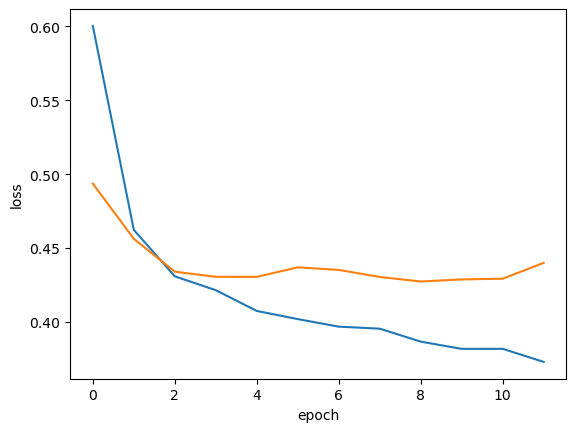

In [112]:
#훈련 손실과 검증 손실 그래프 생성
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend
plt.show()

#-----------------------------------------------------------------
#그래프를 보면 훈련 손실이 잘 줄어들고 있지만 과대적합을 잘 억제하지 못한 것 같음

<h3>순환층에 드롭아웃 적용하기</h3>

- 순환층은 자체적으로 드롭아웃 기능을 제공
- `SimpleRNN`과 `LSTM` 클래스 모두 `dropout` 매개변수와 `recurrent_dropout` 매개변수를 갖고 있음
<br>

---
>`드롭아웃`은 은닉층에 있는 뉴런의 출력을 랜덤하게 꺼서 과대적합을 막는 기법
---
<br>

- `dropout`매개변수는 셀의 입력에 드롭아웃을 적용하고 recurrent_dropout은 순환되는 은닉 상태에 드롭아웃을 적용
- 기술적인 문제로 recurrent_dropout을 사용하면 GPU를 사용하여 모델 훈련 불가능
    - 모델 훈련 속도가 현저히 느려짐
- 이 교재에서는 dropout만을 사용

In [113]:
#LSTM 클래스에 dropout 매개변수를 0.2로 지정하여 20%의 입력을 드롭아웃
model_dropout = keras.Sequential()
model_dropout.add(keras.layers.Input(shape=(100,)))
model_dropout.add(keras.layers.Embedding(500, 16))
model_dropout.add(keras.layers.LSTM(8, dropout=0.2))
model_dropout.add(keras.layers.Dense(1, activation='sigmoid'))

In [114]:
#모델 훈련
model_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model_dropout.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

#-----------------------------------------------------------------------------
#드롭아웃을 추가했더니 모델의 성능이 약간 줄어듦

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.5857 - loss: 0.6597 - val_accuracy: 0.7622 - val_loss: 0.5032
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7676 - loss: 0.4927 - val_accuracy: 0.7826 - val_loss: 0.4635
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.7878 - loss: 0.4545 - val_accuracy: 0.7704 - val_loss: 0.4851
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.7939 - loss: 0.4417 - val_accuracy: 0.7798 - val_loss: 0.4551
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.8076 - loss: 0.4189 - val_accuracy: 0.7998 - val_loss: 0.4346
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.8126 - loss: 0.4112 - val_accuracy: 0.7996 - val_loss: 0.4415
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.8116 - loss: 0.4105 - val_accuracy: 0.8020 - val_loss: 0.4262
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.8178 - loss: 0

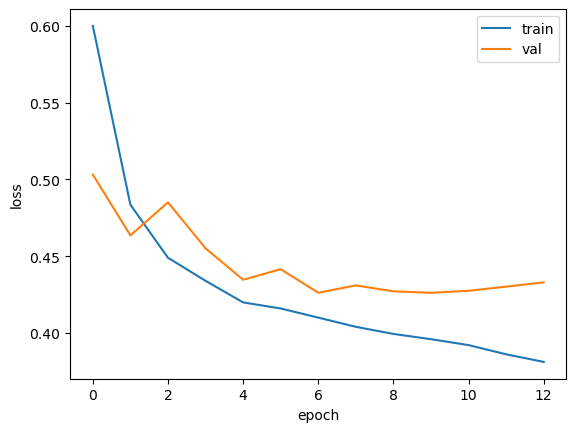

In [115]:
#훈련 손실과 검증 손실 그래프 생성
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

#----------------------------------------
#LSTM 층에 적용한 드롭아웃 덕부에 훈련 손실이 줄어드는 것을 조금 억제했지만 검증 손실이 더 나아지지는 않음

<h3>2개의 층 연결하기</h3>

- 순환층을 연결할 때는 한 가지 주의사항이 있음
- 순환층의 은닉 상태는 샘플의 마지막 타임스텝에 대한 은닉 상태만 다음 층으로 전달
- 하지만 순환층을 쌓게 되면 모든 순환층에 순차 데이터가 필요
- 따라서 앞쪽의 순환층이 모든 타임스텝에 대한 은닉 상태를 출력해야 함
- 오직 마지막 순환층만 마지막 타임스텝의 은닉 상태를 출력

In [116]:
#케라스의 순환층에서 모든 타임스텝의 은닉 상태를 출력하려면 마지막을 제외한 다른 모든 순환층에서 return_sequences 매개변수를 True로 지정
model_2lstm = keras.Sequential()
model_2lstm.add(keras.layers.Input(shape=(100,)))
model_2lstm.add(keras.layers.Embedding(500, 16))
model_2lstm.add(keras.layers.LSTM(8, dropout=0.2, return_sequences=True))
model_2lstm.add(keras.layers.LSTM(8, dropout=0.2))
model_2lstm.add(keras.layers.Dense(1, activation='sigmoid'))
model_2lstm.summary()

#--------------------------------------------------------------------------
#2개의 LSTM층을 쌓고 모두 드롭아웃을 0.2로 지정
#첫 번재 LSTM 크래스에 return_sequences 매개변수를 True로 지정

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 8)         │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 8)              │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,353 (36.54 KB)

 Trainable params: 9,353 (36.54 KB)

 Non-trainable params: 0 (0.00 B)

In [117]:
#summary() 메서드로 결과 확인
model_2lstm.summary()

#------------------------------------------------------
#첫 번째 LSTM 층이 모든 타임스텝(100개)의 은닉 상태를 출력하기 때문에 출력 크기가 (None, 100, 8)로 표시
#두 번재 LSTM 층의 출력 크기는 마지막 타임스텝의 은닉 상태만 출력하기 때문에 (None, 8)

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 8)         │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 8)              │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,353 (36.54 KB)

 Trainable params: 9,353 (36.54 KB)

 Non-trainable params: 0 (0.00 B)

In [118]:
#모델 훈련
model_2lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model_2lstm.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

#-------------------------------------------------------------------------
#모델은 잘 훈련되었지만 순환층을 쌓아 그리 큰 효과를 얻지 못함
#일반적으로 순환층을 쌓으면 성능이 높아짐

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.5885 - loss: 0.6598 - val_accuracy: 0.7274 - val_loss: 0.5432
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.7757 - loss: 0.4893 - val_accuracy: 0.7882 - val_loss: 0.4577
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.7895 - loss: 0.4575 - val_accuracy: 0.7654 - val_loss: 0.4824
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.7973 - loss: 0.4412 - val_accuracy: 0.8004 - val_loss: 0.4388
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.8017 - loss: 0.4294 - val_accuracy: 0.7548 - val_loss: 0.5068
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - accuracy: 0.8003 - loss: 0.4286 - val_accuracy: 0.8078 - val_loss: 0.4312
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.8129 - loss: 0.4122 - val_accuracy: 0.8034 - val_loss: 0.4310
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - accuracy: 0.8143 - loss: 0

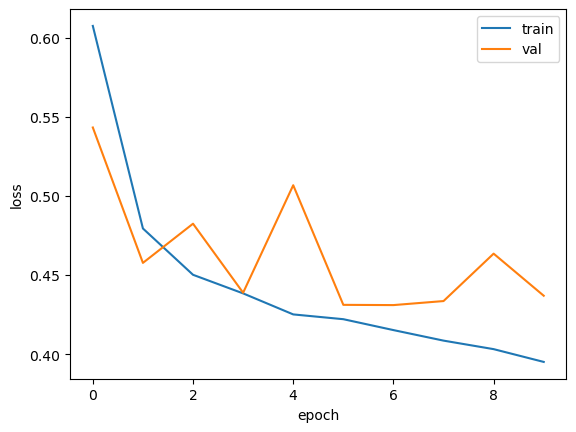

In [119]:
#손실 그래프로 훈련 과정 확인
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

<h3>GRU구조</h3>

- **GRU: Gated Recurrent Unit**
- LSTM의 간소화한 버전
- LSTM처럼 셀 상태를 계산하지 않고 은닉 상태 하나만 포함
<br>

- GRU셀에는 은닉 상태와 입력에 가중치를 곱하고 절편을 더하는 작은 셀이 3개 들어 있음
- 2개는 시그모이드 활성화 함수를 사용하고 하나는 tanh 활성화 함수를 사용
- 은닉 상태와 입력에 곱해지는 가중치를 합쳐서 표현
<br>

- $w_z$를 사용하는 셀의 출력이 은닉 상태에 바로 곱해져 삭제 게이트 역할
- 이와 똑같은 출력을 1에서 뺀 다음에 가장 오른쪽 $w_g$를 사용하는 셀의 출력에 곱함
    - 입력되는 정보를 제어하는 역할 수행
- $w_r$을 사용하는 셀에서 출력된 값은 $w_g$셀이 사용할 은닉 상태의 정보를 제어
<br>

- GRU 셀은 LSTM보다 가중치가 적기 때문에 계산량이 적지만 LSTM 못지 않은 좋은 성능을 냄
<br>

<h3>GRU 신경망 훈련하기</h3>

In [120]:
model_gru = keras.Sequential()
model_gru.add(keras.layers.Input(shape=(100,)))
model_gru.add(keras.layers.Embedding(500, 16))
model_gru.add(keras.layers.GRU(8, dropout=0.2))
model_gru.add(keras.layers.Dense(1, activation='sigmoid'))

In [121]:
#구조 확인
model_gru.summary()

#---------------------------------------------------------
#GRU 층의 모델 파라미터 개수 계산
#GRU 셀에는 3개의 작은 셀이 있음
#작은 셀에는 입력과 은닉 상태에 곱하는 가중치와 절편이 있음
##입력에 곱하는 가중치는 16 x 8 = 128개
##은닉상태에 곱하는 가중치는 8 x 8 = 64개
##절편은 뉴런마다 하나씩이므로 8개
##모두 더하면 128 + 64 + 8 = 200개
##이런 작은 셀이 3개이므로 모두 600개의 모델 파라미터가 필요함
##그런데 summary()의 출력값은 624개임을 알 수 있음
###은닉 상태에 곱해지는 가중치 외에 절편이 별도로 필요
###따라서 작은 셀 마다 하나씩 절편이 추가되고 8개의 뉴런이 있으므로 총 24개의 모델 파라미터가 더해짐
###따라서 GRU 층의 총 모델 파라미터 개수는 624개

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 8)              │           624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,633 (33.72 KB)

 Trainable params: 8,633 (33.72 KB)

 Non-trainable params: 0 (0.00 B)

In [122]:
#GRU 셀을 이용한 모델 훈련
model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model_gru.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.5840 - loss: 0.6647 - val_accuracy: 0.7556 - val_loss: 0.5313
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.7565 - loss: 0.5084 - val_accuracy: 0.7722 - val_loss: 0.4714
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.7900 - loss: 0.4600 - val_accuracy: 0.7628 - val_loss: 0.4892
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.7955 - loss: 0.4515 - val_accuracy: 0.7876 - val_loss: 0.4511
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.8037 - loss: 0.4307 - val_accuracy: 0.7648 - val_loss: 0.4941
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.8011 - loss: 0.4348 - val_accuracy: 0.7876 - val_loss: 0.4570
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.8054 - loss: 0.4252 - val_accuracy: 0.7988 - val_loss: 0.4357
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.8149 - loss: 0

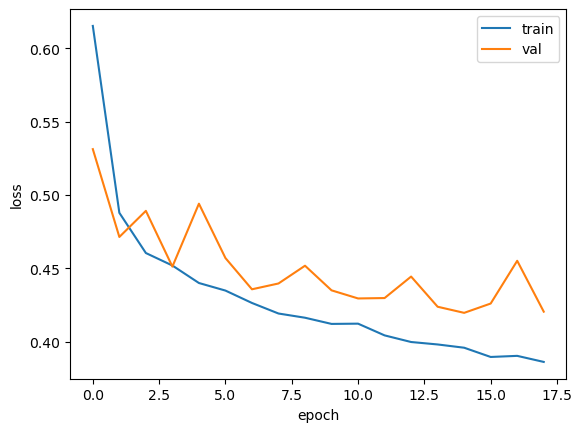

In [123]:
#모델의 손실 그래프
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [124]:
#마지막에 훈련한 GRU모델을 다시 로드하여 테스트 세트에 대한 성능 확인
#테스트 세트를 훈련 세트와 동일한 방식으로 변환
#그다음 load_model() 함수를 사용해 best-gru-model.keras 파일을 읽고 evaluate() 메서드로 테스트 세트에서 성능 계산
test_seq = pad_sequences(test_input, maxlen=100)
best_model = keras.models.load_model('best-gru-model.keras')
best_model.evaluate(test_seq, test_target)

782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.8105 - loss: 0.4171


[0.4160080850124359, 0.8090000152587891]